In [1]:
# import libraries
#!pip install turicreate
import numpy as np
import pandas as pd
#import turicreate
from sklearn.preprocessing import OneHotEncoder

In [2]:
# libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Encoders
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder

# Strategic imports
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV, train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Machine learning Models
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier, VotingClassifier

from tensorflow import keras
import tensorflow as tf

# imports to mute warnings
pd.options.display.max_rows=200
pd.set_option('mode.chained_assignment', None)

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
simplefilter("ignore", category=RuntimeWarning)

print("sns.__version__", sns.__version__)
#print("sklearn.__version__", sklearn.__version__)

sns.__version__ 0.11.1


In [3]:
train = pd.read_csv('../input/alc-datathon-2021/covid_mental_health_train.csv')
test = pd.read_csv('../input/alc-datathon-2021/covid_mental_health_test.csv')

In [4]:
# summary stats
train.describe()

,id,city,gender,age,job,health_worker_self,health_worker_family,family_status,income_group,current_physical,...,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work,depression
count,8.610000e+03,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,7282.000000,8610.000000,...,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000
mean,1.072829e+09,3.424274,1.525784,46.088269,1.649826,1.939721,1.911498,1.619628,4.308981,1.956330,...,5.245412,4.046690,3.849361,2.706272,3.461208,4.031243,2.754704,3.697909,3.871893,0.180488
std,6.189227e+08,2.008436,0.499364,14.727426,1.118760,0.238016,0.284040,0.485506,2.653107,0.204372,...,1.872720,1.663155,1.873872,1.766552,1.829900,1.767684,1.753610,1.888003,2.048310,0.384616
min,3.652360e+05,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,5.360256e+08,2.000000,1.000000,34.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,...,4.000000,3.000000,2.000000,1.000000,2.000000,3.000000,1.000000,2.000000,2.000000,0.000000
50%,1.079098e+09,3.000000,2.000000,46.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,...,6.000000,4.000000,4.000000,2.000000,4.000000,4.000000,2.000000,4.000000,4.000000,0.000000
75%,1.603533e+09,5.000000,2.000000,57.000000,2.000000,2.000000,2.000000,2.000000,5.000000,2.000000,...,7.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,0.000000
max,2.147087e+09,7.000000,2.000000,89.000000,5.000000,2.000000,2.000000,2.000000,10.000000,2.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,1.000000


In [5]:
train.columns.tolist()

['id',
 'city',
 'gender',
 'age',
 'job',
 'health_worker_self',
 'health_worker_family',
 'family_status',
 'income_group',
 'current_physical',
 'past_physical',
 'current_mental',
 'past_mental',
 'exercise',
 'healthy_diet',
 'healthy_sleep',
 'activity',
 'interaction_offline',
 'interaction_online',
 'preventive_behaviors',
 'optimism',
 'deterioration_economy',
 'deterioration_interact',
 'frustration',
 'covid_anxiety',
 'covid_sleepless',
 'difficulty_living',
 'difficulty_work',
 'depression']

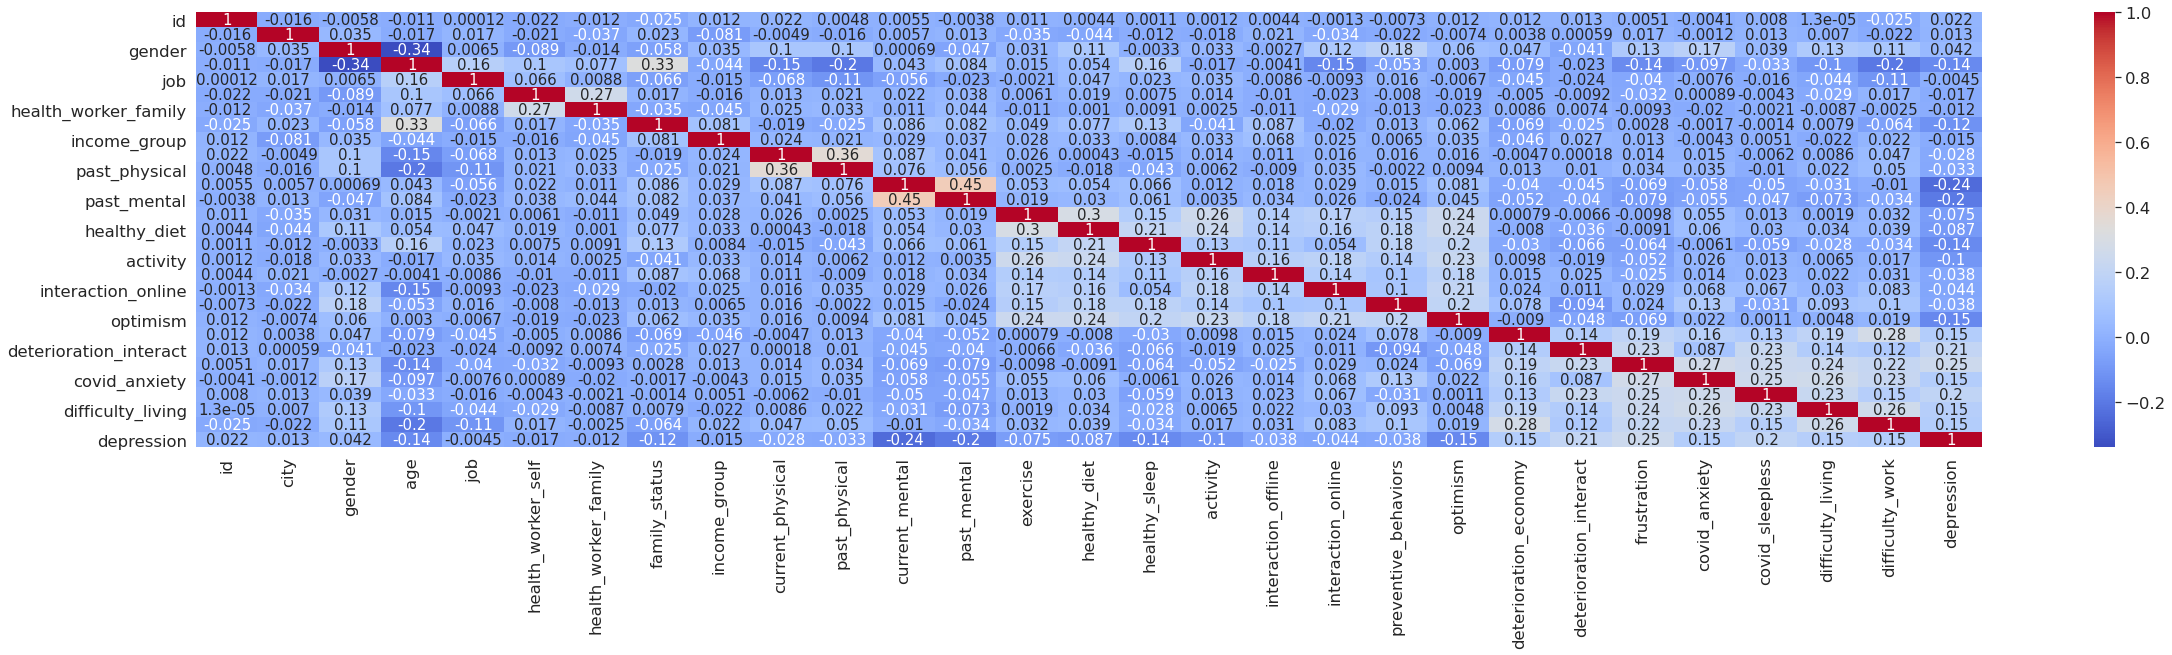

In [6]:
plt.figure(figsize=(40, 8))
sns.set(font_scale=1.5)
sns.heatmap(train.corr(), cmap='coolwarm', annot=True, annot_kws={'size':15})
plt.show()

# Income Group

In [7]:
cat = pd.cut(train.income_group,bins=[1, 3, 6, 10],labels=['low','mid','high'])
train.insert(2, "income_group_binning", cat)
train.head()

,id,city,income_group_binning,gender,age,job,health_worker_self,health_worker_family,family_status,income_group,...,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work,depression
0,1963059261,1,NaN,1,65,4,2,2,1,1.0,...,5,4,1,1,5,2,1,6,5,0
1,591108995,4,low,1,68,1,2,2,2,3.0,...,7,4,5,4,4,4,4,4,5,0
2,613190420,2,low,1,68,4,2,2,2,3.0,...,5,5,1,1,1,5,2,1,1,0
3,1011726889,7,mid,1,66,4,2,2,2,5.0,...,6,7,1,1,7,1,1,1,1,0
4,345550215,2,high,1,72,4,2,2,2,10.0,...,6,5,2,1,1,6,1,1,4,0


In [8]:
cat = pd.cut(test.income_group,bins=[1, 3, 6, 10],labels=['low','mid','high'])
test.insert(2, "income_group_binning", cat)
test.head()

,id,city,income_group_binning,gender,age,job,health_worker_self,health_worker_family,family_status,income_group,...,interaction_online,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work
0,828763412,3,low,2,45,2,2,2,2,2.0,...,6,6,6,4,4,5,5,3,5,2
1,2009293273,2,low,2,32,2,2,1,2,2.0,...,1,7,5,5,1,1,6,5,1,5
2,360753013,1,low,2,34,1,2,2,1,3.0,...,5,4,7,1,1,3,5,1,2,3
3,321912830,3,mid,1,49,1,2,2,2,4.0,...,2,6,1,2,2,2,5,2,6,5
4,1090960107,7,low,1,42,1,2,2,1,2.0,...,2,7,2,5,3,5,5,2,7,7


# One hot encoding

In [9]:
new_train = pd.DataFrame()
new_train["income_group_binning"] = train["income_group_binning"]
new_train["depression"] = train["depression"]
new_train["id"] = train["id"]
new_train.head()

,income_group_binning,depression,id
0,NaN,0,1963059261
1,low,0,591108995
2,low,0,613190420
3,mid,0,1011726889
4,high,0,345550215


In [10]:
one_hot_encoded_training_predictors = pd.get_dummies(new_train)
one_hot_encoded_training_predictors.head()

,depression,id,income_group_binning_low,income_group_binning_mid,income_group_binning_high
0,0,1963059261,0,0,0
1,0,591108995,1,0,0
2,0,613190420,1,0,0
3,0,1011726889,0,1,0
4,0,345550215,0,0,1


In [11]:
new_test = pd.DataFrame()
new_test["income_group_binning"] = test["income_group_binning"]
new_test["id"] = test["id"]
new_test.head()

,income_group_binning,id
0,low,828763412
1,low,2009293273
2,low,360753013
3,mid,321912830
4,low,1090960107


In [12]:
one_hot_encoded_test = pd.get_dummies(new_test)
one_hot_encoded_test.head()

,id,income_group_binning_low,income_group_binning_mid,income_group_binning_high
0,828763412,1,0,0
1,2009293273,1,0,0
2,360753013,1,0,0
3,321912830,0,1,0
4,1090960107,1,0,0


In [13]:
X_trainTest = one_hot_encoded_training_predictors.drop(columns = "depression")
Y_trainTest = one_hot_encoded_training_predictors["depression"]
X_testTest = one_hot_encoded_test
X_trainTest.head()

,id,income_group_binning_low,income_group_binning_mid,income_group_binning_high
0,1963059261,0,0,0
1,591108995,1,0,0
2,613190420,1,0,0
3,1011726889,0,1,0
4,345550215,0,0,1


In [14]:
X_trainTest.to_csv("X_trainTest.csv")
Y_trainTest.to_csv("Y_trainTest.csv")
X_testTest.to_csv("X_testTest.csv")

# Feature Importance

In [15]:
rforest_checker = RandomForestClassifier(random_state = 0)
rforest_checker.fit(X_trainTest, Y_)
importances_df = pd.DataFrame(rforest_checker.feature_importances_, columns=['Feature_Importance'],
                              index=X_train_analysis.columns)
importances_df.sort_values(by=['Feature_Importance'], ascending=False, inplace=True)
print(importances_df)

NameError: name 'Y_' is not defined

# Applying models

In [16]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import make_pipeline

In [17]:
param_grid = {
    'polynomialfeatures__degree': [1,2,3],
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

In [18]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5).fit(X_trainTest, Y_trainTest)

NameError: name 'pipe' is not defined

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [19]:
print("Best params: {}".format(grid.best_params_))
print("Best CV score: {}".format(grid.best_score_))
print("Training accuracy: {}".format(grid.score(X_trainTest, Y_trainTest)))
#print("Test accuracy: {}".format(grid.score(X_test, y_test)))

NameError: name 'grid' is not defined

# Apply models

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

In [21]:
# Logistic Regression

logreg = LogisticRegressionCV()
logreg.fit(X_trainTest, Y_trainTest)
Y_pred = logreg.predict(X_trainTest)
acc_log = round(logreg.score(X_trainTest, Y_trainTest) * 100, 2)
acc_log
print(roc_auc_score(Y_trainTest, Y_pred))

0.5


In [22]:
Y_pred_for_test = logreg.predict(X_testTest)

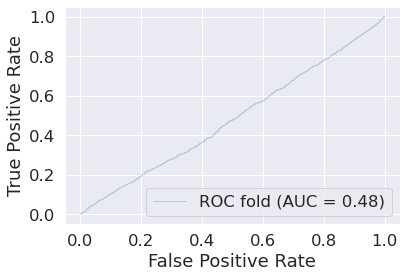

In [23]:
viz = plot_roc_curve(logreg, X_trainTest, Y_trainTest, name='ROC fold', alpha=0.3, lw=1)

In [24]:
submission = pd.DataFrame({'id':test.id,'depression':Y_pred_for_test})

In [25]:
submission.head()

,id,depression
0,828763412,0
1,2009293273,0
2,360753013,0
3,321912830,0
4,1090960107,0


In [26]:
submission.to_csv("26_Newbies_attempt_LogisticRegression_consideringIncomeGroup.csv", index = False)